# Pregunta 3

#### a) En primer lugar se genera la matriz dispersa leyendo el archivo de skill de los usuarios.

In [11]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, hstack
from sklearn.cross_validation import train_test_split

%matplotlib inline

def CrearSparse():
    row, col, data, linea = [], [], [], []
    lineas = open("user_skill").readlines();
    N = len(lineas)
    D = len(open("skill_id").readlines());
    for n in lineas:
        linea = n.split(":")
        user=int(linea[0])
        features = linea[1].split("\n")[0].split(",")
        features = map(int, features)
        for i in features:
            row.append(user)
            col.append(i)
            data.append(1)
    
    row = np.array(row)
    col = np.array(col)
    data = np.array(data)
    Z = csr_matrix((data, (row, col)), shape=(N, D))
    return Z
        
Z = CrearSparse()


#### b) Se generan las matrices de entrenamiento y de prueba, para ello se utiliza la función "train_test_split" de sklearn que divide aleatoriamente los datos según la semilla que se le pase como parámetro.

In [2]:
Z_tr, Z_ts = train_test_split(Z, test_size=0.25, random_state=0)
print "Tamaño matriz entrenamiento Z_tr: " + str(Z_tr.shape)
print "Tamaño matriz pruebas Z_ts: " + str(Z_ts.shape)

Tamaño matriz entrenamiento Z_tr: (5917, 14544)
Tamaño matriz pruebas Z_ts: (1973, 14544)


In [3]:
competencias = Z.sum(axis=0)

#### c)  Se crea un gráfico para visualizar el número de usuarios que declara cada competencia. Debido a que son muchas competencias y además están en distintos órdenes de magnitud, se opta por un gráfico logarítmico.

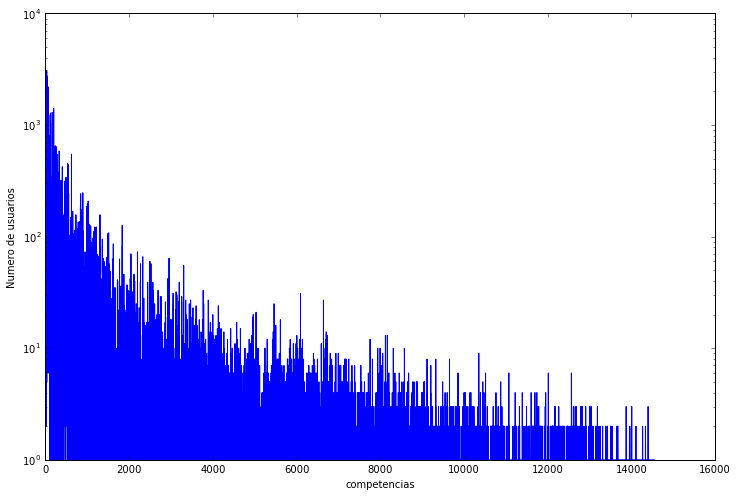

In [4]:
plt.figure(figsize=(12, 8))
plt.xlabel("competencias")
plt.ylabel("Numero de usuarios")
plt.semilogy(competencias.A1)
plt.show()


#### d) Se escoge en este caso la séptima columna que corresponde a PHP para ser evaluada y estimada por los clasificadores.

In [5]:
y_tr = Z_tr.getcol(6).A.T[0]
# notar como se escoge indice print y_tr[25,0]
X_tr = hstack([Z_tr[:,0:6],Z_tr[:,6+1:]]).tocsr()
print "Dimension matriz de entrenamiento X_tr: " + str(X_tr.shape)
y_ts = Z_ts.getcol(6).A.T[0]
X_ts = hstack([Z_ts[:,0:6],Z_ts[:,6+1:]]).tocsr()
print "Dimension matriz de pruebas X_ts: " + str(X_ts.shape)

Dimension matriz de entrenamiento X_tr: (5917, 14543)
Dimension matriz de pruebas X_ts: (1973, 14543)


#### e)  A continuación se definen los clasificadores a utilizar, que corresponden a Bernoulli, Multinomial NB, regresión logística, SVM y KNN.

In [6]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

def score_the_model(model,x,y,xt,yt,text):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt,yt)
    print "Training Accuracy %s: %f"%(text,acc_tr)
    print "Test Accuracy %s: %f"%(text,acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))
    
def do_NAIVE_BAYES(x,y,xt,yt,imp=1):
    model = BernoulliNB()
    model = model.fit(x, y)
    if imp==1:
        score_the_model(model,x,y,xt,yt,"BernoulliNB")
    return model

def do_MULTINOMIAL(x,y,xt,yt,imp=1):
    model = MultinomialNB()
    model = model.fit(x, y)
    if imp==1:
        score_the_model(model,x,y,xt,yt,"MULTINOMIAL")
    return model

def do_LOGIT(x,y,xt,yt,imp=1):
    model = LogisticRegression(penalty='l2')
    model = model.fit(x, y)
    if imp==1:
        score_the_model(model,x,y,xt,yt,"LOGISTIC")
    return model
    
def do_SVM(x,y,xt,yt,imp=1):
    model = LinearSVC()
    model = model.fit(x, y)
    if imp==1:
        score_the_model(model,x,y,xt,yt,"SVM")
    return model

def do_KNN(x,y,xt,yt,imp=1):
    model = KNeighborsClassifier()
    model = model.fit(x, y)
    if imp==1:
        score_the_model(model,x,y,xt,yt,"K-NN")
    return model
    

In [7]:
acc_tr =[]
acc_ts = []
def determinarACC(X_tr,y_tr, X_ts, y_ts, acc_tr, acc_ts, imp=1):
    model = do_KNN(X_tr, y_tr, X_ts, y_ts,imp)
    acc_tr.append(model.score(X_tr,y_tr))
    acc_ts.append(model.score(X_ts,y_ts))
    if imp==1:
        print '----------------------------------------------------------'
    model = do_NAIVE_BAYES(X_tr, y_tr, X_ts, y_ts,imp)
    acc_tr.append(model.score(X_tr,y_tr))
    acc_ts.append(model.score(X_ts,y_ts))
    if imp==1:
        print '----------------------------------------------------------'
    model = do_MULTINOMIAL(X_tr, y_tr, X_ts, y_ts,imp)
    acc_tr.append(model.score(X_tr,y_tr))
    acc_ts.append(model.score(X_ts,y_ts))
    if imp==1:
        print '----------------------------------------------------------'
    model = do_LOGIT(X_tr, y_tr, X_ts, y_ts,imp)
    acc_tr.append(model.score(X_tr,y_tr))
    acc_ts.append(model.score(X_ts,y_ts))
    if imp==1:
        print '----------------------------------------------------------'
    model = do_SVM(X_tr, y_tr, X_ts, y_ts, imp)
    acc_tr.append(model.score(X_tr,y_tr))
    acc_ts.append(model.score(X_ts,y_ts))
    return acc_tr, acc_ts

acc_tr, acc_ts = determinarACC(X_tr,y_tr, X_ts, y_ts, acc_tr, acc_ts)

Training Accuracy K-NN: 0.918540
Test Accuracy K-NN: 0.915357
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.92      0.99      0.95      1718
          -       0.87      0.40      0.55       255

avg / total       0.91      0.92      0.90      1973

----------------------------------------------------------
Training Accuracy BernoulliNB: 0.914315
Test Accuracy BernoulliNB: 0.901673
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.95      0.94      0.94      1718
          -       0.62      0.63      0.62       255

avg / total       0.90      0.90      0.90      1973

----------------------------------------------------------
Training Accuracy MULTINOMIAL: 0.906878
Test Accuracy MULTINOMIAL: 0.881399
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.97      0.89      0.93      1718
          -      

Como se aprecia en las tablas, el mejor resultado se obtiene mediante regresión logística y SVM, sin embargo estas dos técnicas tienden a sobre ajustar, debido a que se requieren un ajuste de híper-parámetros, ya que al ser un espacio de dimensiones tan grande (14544) los híper-planos que forman separan casi perfectamente el espacio de características en los datos de entrenamiento formando así "hard margin". Aun así, siguen siendo técnicas efectivas debido a la naturaleza y simplicidad. Los métodos Naive Bayes generalizan de buena manera y obtienen resultados levemente peores que RL y SVM. 

Finalmente KNN es uno de los métodos para clasificación más simples, y que en este caso funciona muy bien, a pesar que KNN en un espacio de alta dimensionalidad puede tener un gran error, ya que los puntos que representan los datos están muy dispersos en el espacio, la tarea de agrupar vecinos basado en su cercanía se torna compleja, y si los datos no están muy compactados, se pierde la noción de clases. Afortunadamente este no es el caso, y KNN presenta buenos resultados en términos de complejidad y eficacia.

La cantidad de datos es mucho menor que el número de características, por ello la densidad que ocupan los datos en el espacio es muy pequeña, esto muestra cómo afecta la maldición de la dimensionalidad a los algoritmos de clasificación, particularmente a los que se basan en medidas de longitud como la distancia euclidiana al lidiar con problemas de esta naturaleza.

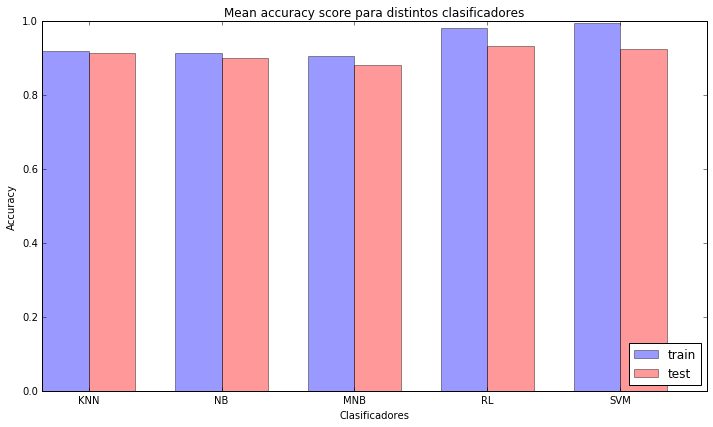

In [8]:
def plotACC(acc_tr, acc_ts):
    fig, ax = plt.subplots(figsize=(10,6))

    index = np.arange(5)
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = plt.bar(index, acc_tr, bar_width,
                     alpha=opacity,
                     color='b',
                     label='train')

    rects2 = plt.bar(index + bar_width, acc_ts, bar_width,
                     alpha=opacity,
                     color='r',
                     label='test')

    plt.xlabel('Clasificadores')
    plt.ylabel('Accuracy')
    plt.title('Mean accuracy score para distintos clasificadores')
    plt.xticks(index + bar_width, ('KNN', 'NB', 'MNB', 'RL', 'SVM'))
    plt.legend(loc=4)

    plt.tight_layout()
    plt.show()

plotACC(acc_tr, acc_ts)



A continuación se observa cómo cambia el comportamiento de SVM al variar el parámetro C que define el margen del híper-plano separador. Una situación similar ocurre con regresión logística.

In [9]:
model = LinearSVC(C=0.01)
model = model.fit(X_tr, y_tr)
score_the_model(model,X_tr,y_tr,X_ts,y_ts,"SVM")

Training Accuracy SVM: 0.955214
Test Accuracy SVM: 0.934617
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.95      0.97      0.96      1718
          -       0.79      0.68      0.73       255

avg / total       0.93      0.93      0.93      1973



Es claro que los algoritmos que permiten una adecuada elección de híper-parámetros tienen mejor desempeño, sobre todo en situaciones de alta dimensionalidad. Con respecto a los métodos Naive Bayes, su desempeño en general es bueno, ya que al tener tantas características de entrada, asumir independencia condicional es factible, y los modelos entregan resultados aceptables. El desacoplamiento de una clase de distribuciones condicionales, significa que cada distribución se puede estimar como una distribución dimensional independiente. Esto ayuda a manejar los problemas derivados de la maldición de la dimensionalidad, ya que no requiere demasiados datos para modelar de buena manera el problema de clasificación.

#### f) En esta seccion se repite el procedimiento anterior, pero variando la cantidad de datos utilizados en el training y testing set. Ademas se evaluan los clasificadores para diferentes competencias del dataset.


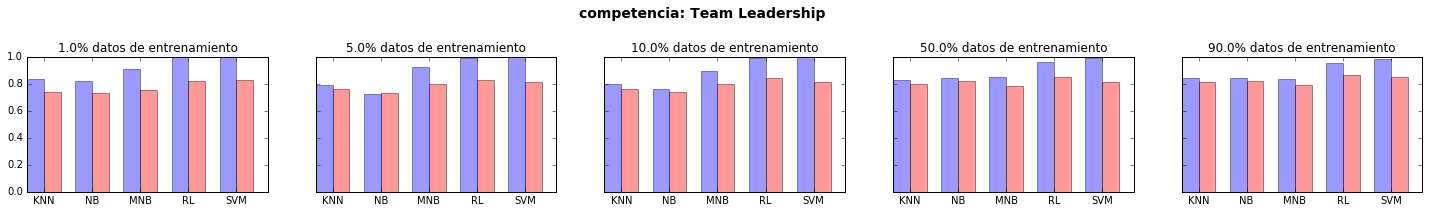

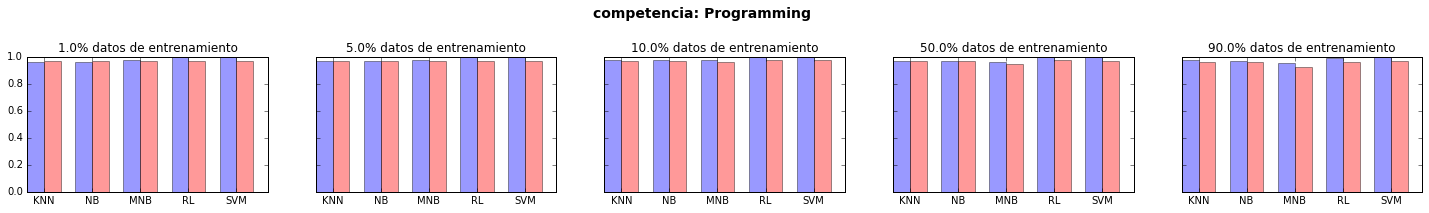

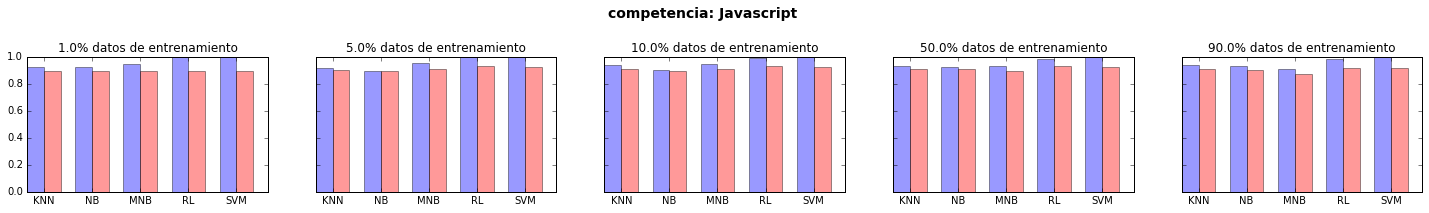

In [10]:
competencias={1:'Team Leadership', 4:'Programming', 5:'Javascript'}
for i in [1,4,5]:
    fig, ax = plt.subplots(ncols=5,sharey=True, figsize=(25,3))
    fig.suptitle('competencia: '+ competencias[i], fontsize=14, fontweight='bold')
    fig.subplots_adjust(top=0.75)
    #fig.text(0.06, 0.5, 'competencia: '+ competencias[i-1] , ha='center', va='center', rotation='horizontal')
    for j,t in zip([0.99,0.95,0.9,0.5,0.1], range(0,5)):
        Z_tr, Z_ts = train_test_split(Z, test_size=j, random_state=0)
        y_tr = Z_tr.getcol(i).A.T[0]
        X_tr = hstack([Z_tr[:,0:i],Z_tr[:,i+1:]]).tocsr()
        y_ts = Z_ts.getcol(i).A.T[0]
        X_ts = hstack([Z_ts[:,0:i],Z_ts[:,i+1:]]).tocsr()
        acc_tr =[]
        acc_ts = []
        acc_tr, acc_ts = determinarACC(X_tr,y_tr, X_ts, y_ts, acc_tr, acc_ts,imp=0)
        
        index = np.arange(5)
        bar_width = 0.35

        opacity = 0.4
        error_config = {'ecolor': '0.3'}

        rects1 = ax[t].bar(index, acc_tr, bar_width,
                         alpha=opacity,
                         color='b',
                         label='train')

        rects2 = ax[t].bar(index + bar_width, acc_ts, bar_width,
                         alpha=opacity,
                         color='r',
                         label='test')
        
        ax[t].set_title(str((1-j)*100) + '% datos de entrenamiento')
        ax[t].set_xticks(index + bar_width)
        ax[t].set_xticklabels(['KNN', 'NB', 'MNB', 'RL', 'SVM'])
        #ax[t].legend(loc=4)
        

En este caso, los resultados indican que para cantidades pequeñas de datos de entrenamiento, todas las técnicas presentan una precisión regular y similar sobre el conjunto de pruebas, esto se refleja en las barras rojas para 1% y 5%. Una vez que aumenta la cantidad de datos de entrenamiento, a 10% por ejemplo, los métodos KNN, Naive Bayes y Multinomial Naive Bayes continúan con una precisión similar a las anteriores, en cambio Regresión Logística y SVM a medida que aumentan los datos, entrega mejores resultados sobre el test de prueba, pero tienden a sobre ajustar. 

Esta es una característica de los métodos discriminativos vs generativos. Los generativos al hacer presunciones más fuertes sobre los datos, por ejemplo que son condicionalmente independientes (clasificador ingenuo), no dependen demasiado de la cantidad de datos, incluso aunque el espacio dimensional es muy grande. Es por esto que son "eficientes" y regulares. Regresión logística por su parte, hace menos suposiciones de los datos, por lo mismo es un espacio de alta dimensionalidad requiere muchos datos de entrenamiento para encontrar correlación de las variables. 

SVM y Regresión logística, al dividir el espacio mediante híper-planos, son técnicas simples que funcionan muy bien en espacios de alta dimensionalidad (muchos features), pero requieren regularización para no sobre ajustar como ocurre en los gráficos anteriores. KNN en este caso presenta buenos resultados, esto puede deberse principalmente a que la clasificación es binaria.  En casos de multiclases KNN en espacios de alta dimensión produce resultados de peor calidad, ya que al utilizar la distancia L2 (euclidiana) al aumentar los features, los puntos del dataset están cada vez más alejados y se necesita un gran conjunto de datos para cubrir más espacio y que la distancia sea más descriptiva.

Finalmente, se debe notar que la mayor parte de los gráficos entre "competencias" no presentan grandes diferencias, esto puede deberse a que al ser tantas características de entrada, el peso de cada una no afecta en gran medida a los modelos.